- Gráfico tipos de cancer


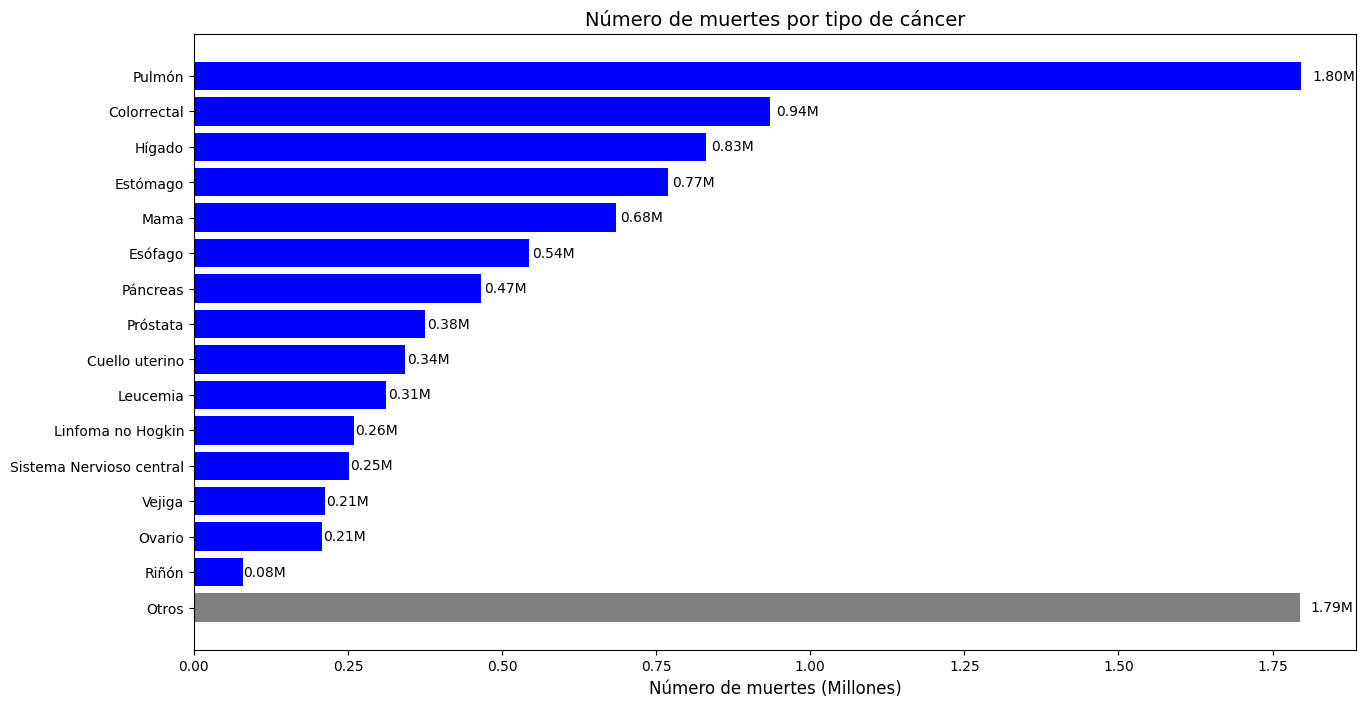

In [8]:
import matplotlib.pyplot as plt
import numpy as np


def plot_cancer_death_bar_chart_reversed_with_numbers_after_bar_in_millions():
    # Categories and their respective values
    cancer_types = ['Otros', 'Riñón', 'Ovario', 'Vejiga', 'Sistema Nervioso central', 
                    'Linfoma no Hogkin', 'Leucemia', 'Cuello uterino', 'Próstata', 
                    'Páncreas', 'Esófago', 'Mama', 'Estómago', 'Hígado', 
                    'Colorrectal', 'Pulmón']
    death_counts = [x / 1e6 for x in [1793761, 79368, 207252, 212536, 251329, 259793, 
                                      311594, 341831, 375304, 466003, 544076, 684996, 
                                      768793, 830180, 935173, 1796144]]  # Convert to millions
    
    # Colors for the bars
    colors = ['blue' if cancer != 'Otros' else 'grey' for cancer in cancer_types]
    
    # Create the bar chart
    fig, ax = plt.subplots(figsize=(15, 8))
    bars = ax.barh(cancer_types, death_counts, color=colors)
    
    # Add data values after the bars
    for bar in bars:
        plt.text(bar.get_width() + 0.01 * bar.get_width(), bar.get_y() + bar.get_height()/2.0, 
                 f"{bar.get_width():.2f}M", va='center', ha='left', color='black', fontsize=10)

    # Labels and title
    ax.set_xlabel('Número de muertes (Millones)',  fontsize=12)
    ax.set_title('Número de muertes por tipo de cáncer',  fontsize=14)

    # Show the plot
    plt.show()

# Run the function to generate the chart with numbers placed after the bars and expressed in millions
plot_cancer_death_bar_chart_reversed_with_numbers_after_bar_in_millions()

- Gráfico estimación numero muertes


- Gráfico estimación numero de nuevos casos

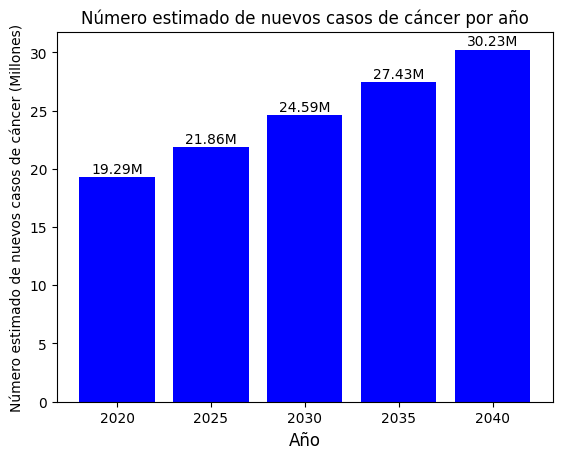

In [9]:
def plot_estimated_cancer_cases_vertical():
    # Data
    years = ['2020', '2025', '2030', '2035', '2040']
    estimated_cases = [x / 1e6 for x in [19292739, 21857570, 24588848, 27425751, 30226151]]  # Convert to millions

    # Create the bar chart
    fig, ax = plt.subplots()
    bars = ax.bar(years, estimated_cases, color='blue')

    # Add data values above the bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height() + 0.1, 
                 f"{bar.get_height():.2f}M", va='bottom', ha='center', color='black', fontsize=10)

    # Labels and title
    ax.set_ylabel('Número estimado de nuevos casos de cáncer (Millones)')
    ax.set_xlabel('Año',  fontsize=12)
    ax.set_title('Número estimado de nuevos casos de cáncer por año',  fontsize=12)

    # Show the plot
    plt.show()

# Run the function to generate the vertical chart for estimated new cases of cancer
plot_estimated_cancer_cases_vertical()


- Gráfico estimación de numero de muertes

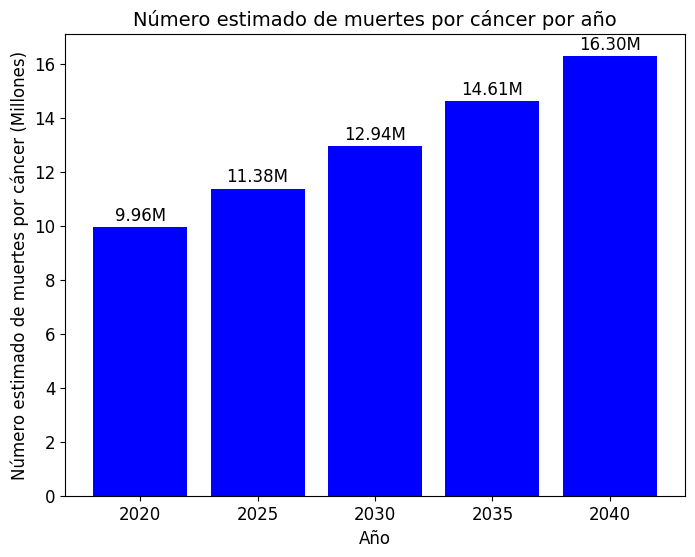

In [10]:
def plot_estimated_cancer_deaths():
    # Data
    years = ['2020', '2025', '2030', '2035', '2040']
    estimated_deaths = [x / 1e6 for x in [9958133, 11380213, 12940153, 14614925, 16300829]]  # Convert to millions

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(years, estimated_deaths, color='blue')

    # Add data values above the bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height() + 0.1, 
                 f"{bar.get_height():.2f}M", va='bottom', ha='center', color='black', fontsize=12)

    # Labels and title with increased font size
    ax.set_ylabel('Número estimado de muertes por cáncer (Millones)', fontsize=12)
    ax.set_xlabel('Año', fontsize=12)
    ax.set_title('Número estimado de muertes por cáncer por año', fontsize=14)

    # Increase the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Show the plot
    plt.show()

# Run the function to generate the vertical chart for estimated cancer deaths
plot_estimated_cancer_deaths()

- Gráfico tres imágenes y sus respectivas máscaras


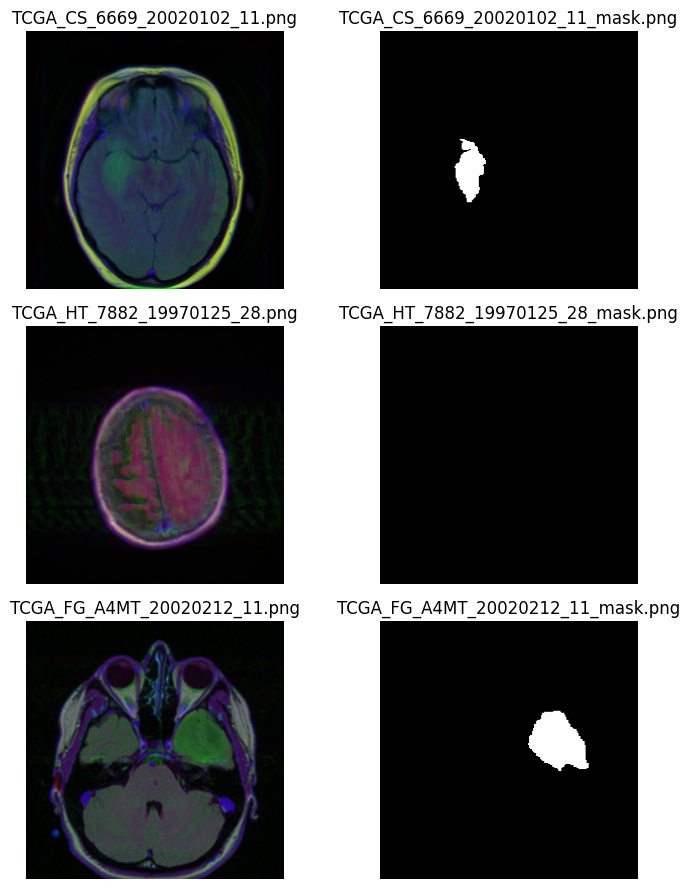

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ast

def plot_images_and_masks(df):
    # Create a single figure for all rows, with 2 subplots per row (one for the image and one for the mask)
    fig, axes = plt.subplots(len(df), 2, figsize=(8, 3 * len(df)))

    for index, (ax, row) in enumerate(zip(axes, df.itertuples())):
        # Define the file paths
        img_path = f'{row.dir}/{row.filename}'
        mask_path = f'{row.dir}/{row.mask}'

        # If there is only one row in the DataFrame, axes will be a 1D array
        if len(df) == 1:
            ax_img, ax_mask = axes
        else:
            ax_img, ax_mask = ax

        # Plot the original image
        try:
            original_img = mpimg.imread(img_path)
            ax_img.imshow(original_img)
        except FileNotFoundError:
            ax_img.text(0.5, 0.5, 'Image not found', ha='center', va='center')
        ax_img.set_title(row.filename)
        ax_img.axis('off')

        # Plot the mask
        try:
            mask_img = mpimg.imread(mask_path)
            ax_mask.imshow(mask_img, cmap='gray')
        except FileNotFoundError:
            ax_mask.text(0.5, 0.5, 'Mask not found', ha='center', va='center')
        ax_mask.set_title(row.mask)
        ax_mask.axis('off')

    plt.tight_layout()
    plt.show()

df = pd.read_csv("../datasets/brain/base_df.csv")
ej = df.loc[[ 12, 1297,2684]]

plot_images_and_masks(ej)


- Gráfico Máscara - Máscara con bbox- Máscara con yolobbox - annotación yolo det

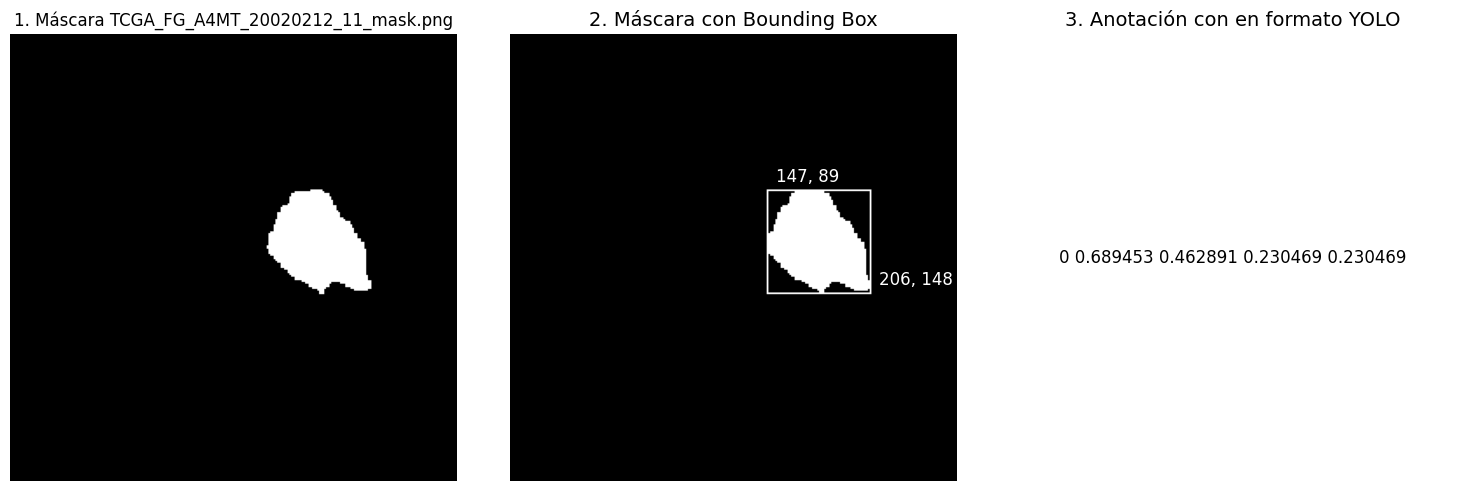

In [70]:
import cv2
import numpy as np

def plot_mask_and_bboxes(df):
    row = df.iloc[0]
    
    mask_path = f"{row['dir']}/{row['mask']}"
    bbox = row['bbox']  # Format: [xmin, xmax, ymin, ymax]
    yolo_bbox = row['yolo_bbox']  # Format: [xcenter, ycenter, width, height]
    
    try:
        # Read the mask image
        mask_img = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    except FileNotFoundError:
        print("Mask image not found.")
        return

    # Create a figure with 1x3 grid
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot the mask image
    axes[0].imshow(mask_img, cmap='gray')
    axes[0].set_title(f"1. Máscara {row['mask']}")
    axes[0].axis('off')
    
    # Plot the mask image with pixel bounding box (corrected coordinates and red line)
    xmin, xmax, ymin, ymax = bbox
    mask_img_bbox = cv2.rectangle(mask_img.copy(), (xmin, ymin), (xmax, ymax), 255, 1)  # Thinner red line
    axes[1].imshow(mask_img_bbox, cmap='gray')
    axes[1].set_title('2. Máscara con Bounding Box', fontsize = 14)
    axes[1].text(xmin + 5, ymin - 5, f"{xmin}, {ymin}", color='white', fontsize=12)  # Moved text a bit away
    axes[1].text(xmax + 5, ymax - 5, f"{xmax}, {ymax}", color='white', fontsize=12)  # Moved text a bit away
    axes[1].axis('off')

    # Plot YOLO bounding box coordinates as text
    img_size = 50
    xcenter, ycenter, width, height = np.array(yolo_bbox) * img_size
    axes[2].text(0.5, 0.5, f"0 {xcenter/img_size:.6f} {ycenter/img_size:.6f} {width/img_size:.6f} {height/img_size:.6f}", 
                ha='center', va='center', fontsize=12)
    axes[2].set_title('3. Anotación con en formato YOLO', fontsize=14)
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

ej = df.loc[[2684]]
ej["bbox"] = ej["bbox"].apply(ast.literal_eval)
ej["yolo_bbox"] = ej["yolo_bbox"].apply(ast.literal_eval)
plot_mask_and_bboxes(ej)

Hecho


- Captura pantalla yml
- Captura balance clases brain data


Pendientes

- Captura de data augmentator
- Figura explicación yolo+sam
- Figura votación de máscaras
- Figura nms
- Figura salida SAM